MEM T380

Case Studies Group 10

Ante Sokosa  
Ziad Hatab

HW2C

# `1    Data Exploration`

Data exploration has been previously explained, discussed, and completed in HW2A+B.  
We are importing this data as explored, cleaned, and prepared with subsets combined.

In [44]:
import pandas as pd

excel_file = 'weld_defect_dataset_cleaned_prepared_and_subsets_combined.xlsx'
df = pd.read_excel(excel_file)
df

,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc,type,type_num,CR,LF,LP,PO,SL
0,0.008596,0.006897,0.5748,0.838397,0.998562,0.091802,0.908459,0.003151,0.111302,0.256742,0.389952,PO,3,0,0,0,1,0
1,0.010029,0.003448,0.4112,0.838397,0.649317,0.039172,0.476520,0.002817,0.121299,0.332611,0.443785,PO,3,0,0,0,1,0
2,0.007163,0.003448,0.4400,1.007173,0.754309,0.048079,0.766430,0.002621,0.127759,0.323068,0.444515,PO,3,0,0,0,1,0
3,0.028653,0.003448,0.3124,0.534599,0.061617,0.244800,0.789110,0.010007,0.092632,0.220312,0.339685,PO,3,0,0,0,1,0
4,0.018625,0.003448,0.4024,0.557089,0.037346,0.578774,0.630554,0.006757,0.073914,0.270908,0.273045,PO,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,0.277937,0.949262,1.0268,0.102869,0.723013,0.025025,0.468658,0.101296,0.757683,0.231426,0.516244,CR,0,1,0,0,0,0
215,0.148997,0.720690,0.8172,0.055527,0.509504,0.135456,0.551284,0.010890,0.262126,0.410800,0.530843,CR,0,1,0,0,0,0
216,0.320917,0.846359,0.7100,0.106793,0.407912,0.027538,0.488077,0.191586,0.757547,0.158517,0.559012,CR,0,1,0,0,0,0
217,0.322350,0.578386,0.6420,0.143629,0.384393,0.039732,0.492730,0.154902,0.640716,0.218541,0.567931,CR,0,1,0,0,0,0


For Reference: 

`Defect Features:`

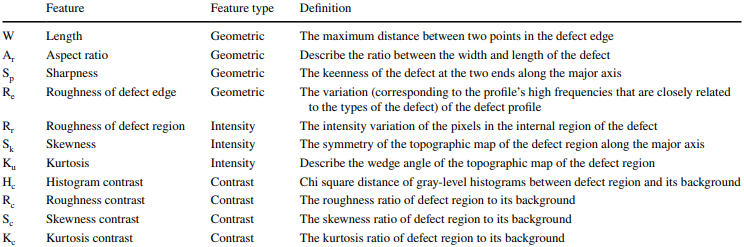

`Defect Types:`  
- `CR` = crack
- `LF` = lack of fusion
- `LP` = lack of penetration
- `PO` = porosity
- `SL` = slag inclusion

Useing `.info()` and `.describe()` for data confirmation and reference:

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   w         219 non-null    float64
 1   ar        219 non-null    float64
 2   sp        219 non-null    float64
 3   re        219 non-null    float64
 4   rr        219 non-null    float64
 5   sk        219 non-null    float64
 6   ku        219 non-null    float64
 7   hc        219 non-null    float64
 8   rc        219 non-null    float64
 9   sc        219 non-null    float64
 10  kc        219 non-null    float64
 11  type      219 non-null    object 
 12  type_num  219 non-null    int64  
 13  CR        219 non-null    int64  
 14  LF        219 non-null    int64  
 15  LP        219 non-null    int64  
 16  PO        219 non-null    int64  
 17  SL        219 non-null    int64  
dtypes: float64(11), int64(6), object(1)
memory usage: 30.9+ KB


In [50]:
df.select_dtypes(include=['float64']).describe()


,w,ar,sp,re,rr,sk,ku,hc,rc,sc,kc
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.176636,0.208510,0.599917,0.391446,0.249936,0.167753,0.604430,0.092718,0.216547,0.240620,0.478471
std,0.192585,0.256884,0.216652,0.265466,0.208867,0.164427,0.151247,0.138793,0.173341,0.143348,0.150952
min,0.001433,0.003448,0.025200,0.000591,0.000118,0.001608,0.168895,0.000013,0.004129,0.001474,0.028573
25%,0.037250,0.012357,0.415600,0.131266,0.087341,0.064804,0.519690,0.012782,0.108342,0.145656,0.371903
50%,0.078797,0.062834,0.587200,0.409072,0.214041,0.112573,0.570744,0.034153,0.158479,0.215147,0.482290
75%,0.277937,0.363793,0.826800,0.602742,0.341661,0.199904,0.669316,0.113712,0.254108,0.318871,0.572080
max,1.000000,1.037931,1.026800,1.007173,1.003975,1.002376,1.202949,1.049198,1.001281,1.000876,1.025173


# `2    Classification with Ensemble Algorithms`

begin by

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
# set seaborn's default settings
sns.set()